# ggseqlogo for variant motifs

In [2]:
require(ggplot2)
require(ggseqlogo)
library(repr)
library(cowplot)
library(gridExtra)

genome = read.table("ref_genome.mat",sep="\t",row.names=1,stringsAsFactors=F)
p1 = ggseqlogo(as.matrix(genome))+ labs( y="" ,x="")+ theme(
  axis.text.y = element_blank(),
  plot.margin=unit(c(0,0,0,0), "cm"))+
  annotate("text", x = -1, y = 1.2, label = "hg19 (+) ")+
  annotate("text", x = -1, y = 0.3, label = "chr11     ")+
  annotate("text", x = -2, y = 0.5, label = "")+
  annotate("text", x = -1, y = 1.8, label = "                 5'")+
  annotate("text", x = 29.7, y = 1.8, label = "3'")+											  
  annotate('rect', xmin = 12.5, xmax = 13.5, ymin = -0.05, ymax = 2, alpha = .4, fill='pink') +
  scale_x_discrete(position = "top",limits  =c("50354650","","","","","","","","","","50354660","","","","","","","","","","50354670","","","","","","","","")) 


motif = read.table("motif.mat",sep="\t",row.names=1,stringsAsFactors=F)
p2 = ggseqlogo(as.matrix(motif))+ labs(x="",y="" )+ theme(
#   axis.text.x = element_blank(),
  axis.text.y = element_blank(),
  axis.ticks = element_blank(),plot.margin=unit(c(0.1,0,-0.1,0), "cm"))+
  annotate("text", x = -1, y = 1.2, label = "")+
  annotate("text", x = -1, y = 0.3, label = "")+
  annotate("text", x = -2, y = 0.5, label = "")+
  annotate("text", x = -1, y = 1.8, label = "")+
  annotate("text", x = 29.7, y = 1.8, label = "")+  
  annotate('rect', xmin = 12.5, xmax = 13.5, ymin = -0.05, ymax = 2, alpha = .4, fill='pink') +
  annotate("text", x = 8, y = 1, label = "MYB",angle = 0)+ 
  annotate("text", x = 9, y = 0, label = "   0-",angle = 0,size=2)+ 
  annotate("text", x = 9, y = 0.5, label = "0.5-",angle = 0,size=2)+ 
  annotate("text", x = 9, y = 1, label = "   1-",angle = 0,size=2)+ 
  annotate("text", x = 9, y = 1.5, label = "1.5-",angle = 0,size=2)+ 
  annotate("text", x = 9, y = 2, label = "   2-",angle = 0,size=2)+ 
  scale_x_discrete(position = "bottom",limits  =c("","","","","","","","","","1","2","3","4","5","6","7","8","9","","","","","","","","","","","")) 


gRNA = read.table("SNPseq.mat",sep="\t",row.names=1,stringsAsFactors=F)
p3 = ggseqlogo(as.matrix(gRNA))+ labs(x="", y="" )+ theme(
  axis.text.y = element_blank(),
  axis.ticks = element_blank(),plot.margin=unit(c(-0.2,0,0,0), "cm"))+
  annotate("text", x = -1, y = 1.2, label = "")+
  annotate("text", x = -1, y = 0.3, label = "")+
  annotate("text", x = -2, y = 0.5, label = "")+
  annotate("text", x = -1, y = 1.8, label = "")+
  annotate("text", x = 29.7, y = 1.8, label = "")+											  
  annotate('rect', xmin = 12.5, xmax = 13.5, ymin = -0.05, ymax = 2, alpha = .4, fill='pink') +
  annotate('segment', x = 10.5, xend=15.5, y=-0.05, yend=-0.05, size=1) +
  annotate("text", x = 13, y = -0.5, label = " ",size=4)+
  annotate("text", x = 13, y = -0.4, label = "Base editing sites",size=4)  +
  scale_x_discrete(position = "bottom",limits  =c("","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","N","G"," G","","","","","")) 


a=plot_grid(p1, p2,p3, ncol=1,rel_heights = c(1, 1,1)) 
save_plot("example.png", a,base_width=10,base_height=3)




Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: ggseqlogo
Warning message:
"package 'ggseqlogo' was built under R version 3.5.3"Warning message:
"package 'cowplot' was built under R version 3.5.3"
Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Warning message:
"package 'gridExtra' was built under R version 3.5.3"Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


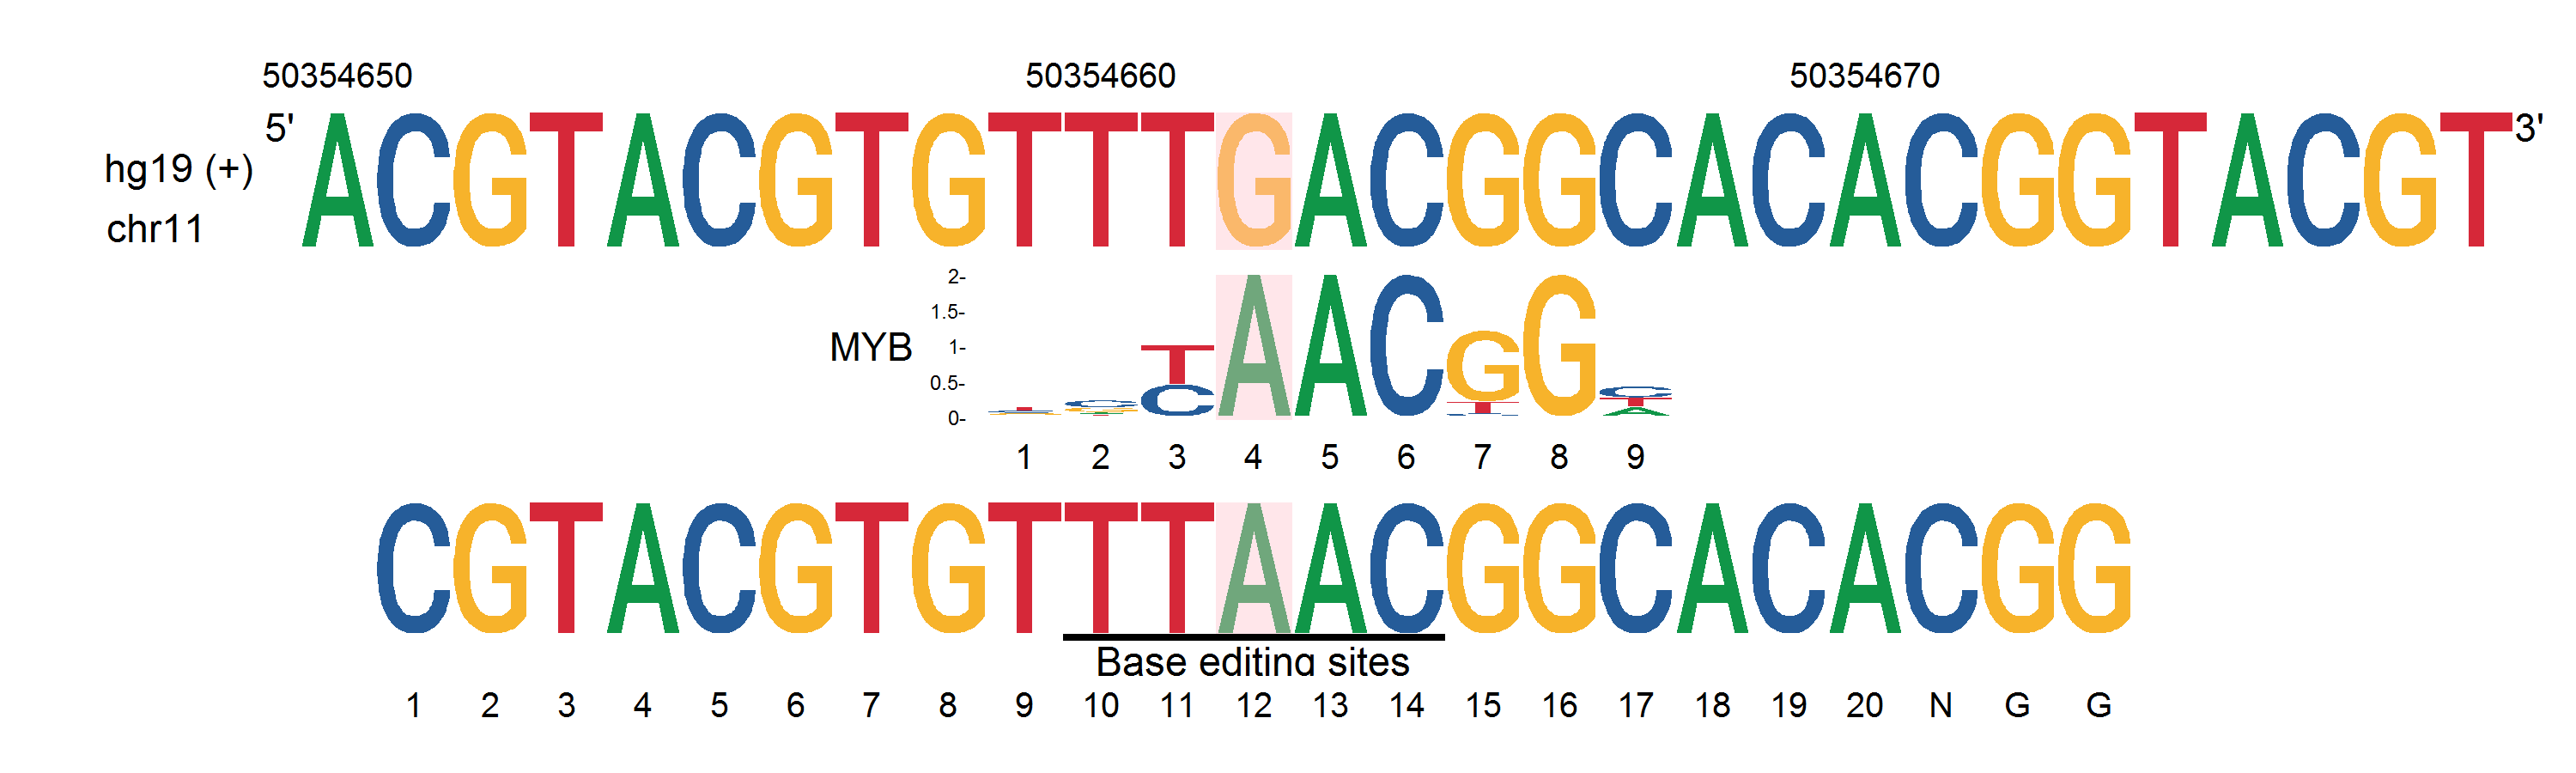

In [1]:
from IPython.display import Image
Image(filename='example.png')

### python code to get the input for R

In [3]:
import numpy as np
import pandas as pd
# python2
# Refseq to matrix

# matrix exd

# SNPseq(e.g. gRNA) highlight

Refseq = 'ACGTACGTGTTTGACGGCACACGGTACGT'
# Refseq = '         TTTRACGGC           '
SNPseq = 'CGTACGTGTTTAACGGCACACGG'
# scan_output  = 'MYB,MA0100.3_MYB.pfm,10,+,5.115259,TTTRACGGCA,tttAacggca'
scan_output  = 'MYB,test.pfm,10,-,5.554,TTTRACGGC,tttAacggc'
def seqtomatrix(seq):
	df = pd.DataFrame(0, index=['A','C','G','T'], columns=range(1,len(seq)+1))
	for i in range(len(seq)):
		df.at[seq[i],i+1] = 1.0
# 		print (seq[i],i,df.at[seq[i],i+1])
# 	print (df.shape)
# 	print (df)
	return df




def extend_motif_matrix(scan_output,Refseq):
	line = scan_output.strip().split(",")
	motif_file = line[1]
	df = pd.read_csv(motif_file,sep="\t",header=None)
	df.index = ['A','C','G','T']
	start_pos = int(line[2])
	match_seq = line[-1]

	df_left = pd.DataFrame(0.25, index=['A','C','G','T'], columns=list(map(lambda x:'left.'+str(x),range(start_pos-1))))
	df_right = pd.DataFrame(0.25, index=['A','C','G','T'], columns=list(map(lambda x:'right.'+str(x),range(len(Refseq)-len(match_seq)-(start_pos-1)))))
	df = pd.concat([df_left,df,df_right],axis=1)
	df.to_csv("motif.mat",sep="\t",header=False)


def SNPseq_matrix(SNPseq,Refseq,left_length,right_length):
	SNP_df = seqtomatrix(SNPseq)
	df_left = pd.DataFrame(0.25, index=['A','C','G','T'], columns=list(map(lambda x:'left.'+str(x),range(left_length))))
	df_right = pd.DataFrame(0.25, index=['A','C','G','T'], columns=list(map(lambda x:'right.'+str(x),range(right_length))))
	df = pd.concat([df_left,SNP_df,df_right],axis=1)
	df.to_csv("SNPseq.mat",sep="\t",header=False)


# seqtomatrix(Refseq).to_csv("ref_genome.mat",sep="\t",header=False)
# seqtomatrix(SNPseq).to_csv("SNPseq.mat",sep="\t",header=False)
seqtomatrix(Refseq).to_csv("ref_genome.mat",sep="\t",header=False)
extend_motif_matrix(scan_output,Refseq)
SNPseq_matrix(SNPseq,Refseq,1,5)

